In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.dates as mdates
wd = %pwd
import os
fdel = os.path.sep
parent = os.path.dirname(wd); grampa = os.path.dirname(parent); ancestor = os.path.dirname(grampa)
print(wd, "\n", parent, "\n", grampa, "\n", ancestor)
import sys
sys.path.append(grampa)
import MacroBackend

/Users/jamesbishop/Documents/Python/Bootleg_Macro/User_Data/BEA 
 /Users/jamesbishop/Documents/Python/Bootleg_Macro/User_Data 
 /Users/jamesbishop/Documents/Python/Bootleg_Macro 
 /Users/jamesbishop/Documents/Python


In [54]:
bea_path = parent+fdel+"BEA"+fdel+"bea_tables"
T10305 = pd.read_excel(f"{bea_path}/T10305_Q.xlsx", sheet_name="Series_Split", index_col=0, parse_dates=True)    
T10305

,Gross domestic product,Business,Nonfarm,Farm,Households and institutions,Households,Nonprofit institutions serving households,General government,Federal,State and local,Gross housing value added
TimePeriod,,,,,,,,,,,
1947-03-31,243164,198094,177787,20307,12434,9220,3214,32636,23896,8740,11730
1947-06-30,245968,201430,184406,17025,13178,9532,3646,31360,22357,9003,12060
1947-09-30,249585,206274,187375,18899,13717,9993,3724,29594,20299,9295,12399
1947-12-31,259745,216423,196417,20006,13975,10202,3773,29347,19646,9701,12756
1948-03-31,265742,221921,202022,19900,14172,10309,3863,29649,19588,10061,13138
...,...,...,...,...,...,...,...,...,...,...,...
2023-09-30,27967697,21594734,21377379,217355,3473788,2013602,1460187,2899174,938461,1960713,2567747
2023-12-31,28296967,21819837,21623441,196396,3537483,2050274,1487209,2939647,950873,1988773,2613752
2024-03-31,28624069,22016021,21831386,184636,3615476,2094827,1520648,2992572,967049,2025523,2666894


In [55]:
majors = T10305[["Gross domestic product", "Business", "Households and institutions", "General government", "Gross housing value added"]]
majors

,Gross domestic product,Business,Households and institutions,General government,Gross housing value added
TimePeriod,,,,,
1947-03-31,243164,198094,12434,32636,11730
1947-06-30,245968,201430,13178,31360,12060
1947-09-30,249585,206274,13717,29594,12399
1947-12-31,259745,216423,13975,29347,12756
1948-03-31,265742,221921,14172,29649,13138
...,...,...,...,...,...
2023-09-30,27967697,21594734,3473788,2899174,2567747
2023-12-31,28296967,21819837,3537483,2939647,2613752
2024-03-31,28624069,22016021,3615476,2992572,2666894


In [56]:
majors["GDP_Aggregate"] = majors[["Business", "Households and institutions", "General government"]].sum(axis = 1)
majors /= 10**6
#Use inline magic command to display plots in the notebook
%matplotlib inline 
bmsylePath = grampa + fdel + "MacroBackend" + fdel + "bm_inline.mplstyle"
%config InlineBackend.figure_format = 'retina'
plt.style.use(bmsylePath)  #This applies the bm_inline style to all matplotlib plots
plt.rcParams['figure.dpi'] = 135  #This sets the default figure size for all matplotlib plots

/var/folders/lj/yg38j90s0mq9l9mk98st457m0000gn/T/ipykernel_69178/3003348900.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [57]:
majors["gov_to_gdp"] = (majors["General government"] / majors["Gross domestic product"]) * 100

/var/folders/lj/yg38j90s0mq9l9mk98st457m0000gn/T/ipykernel_69178/1327363528.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



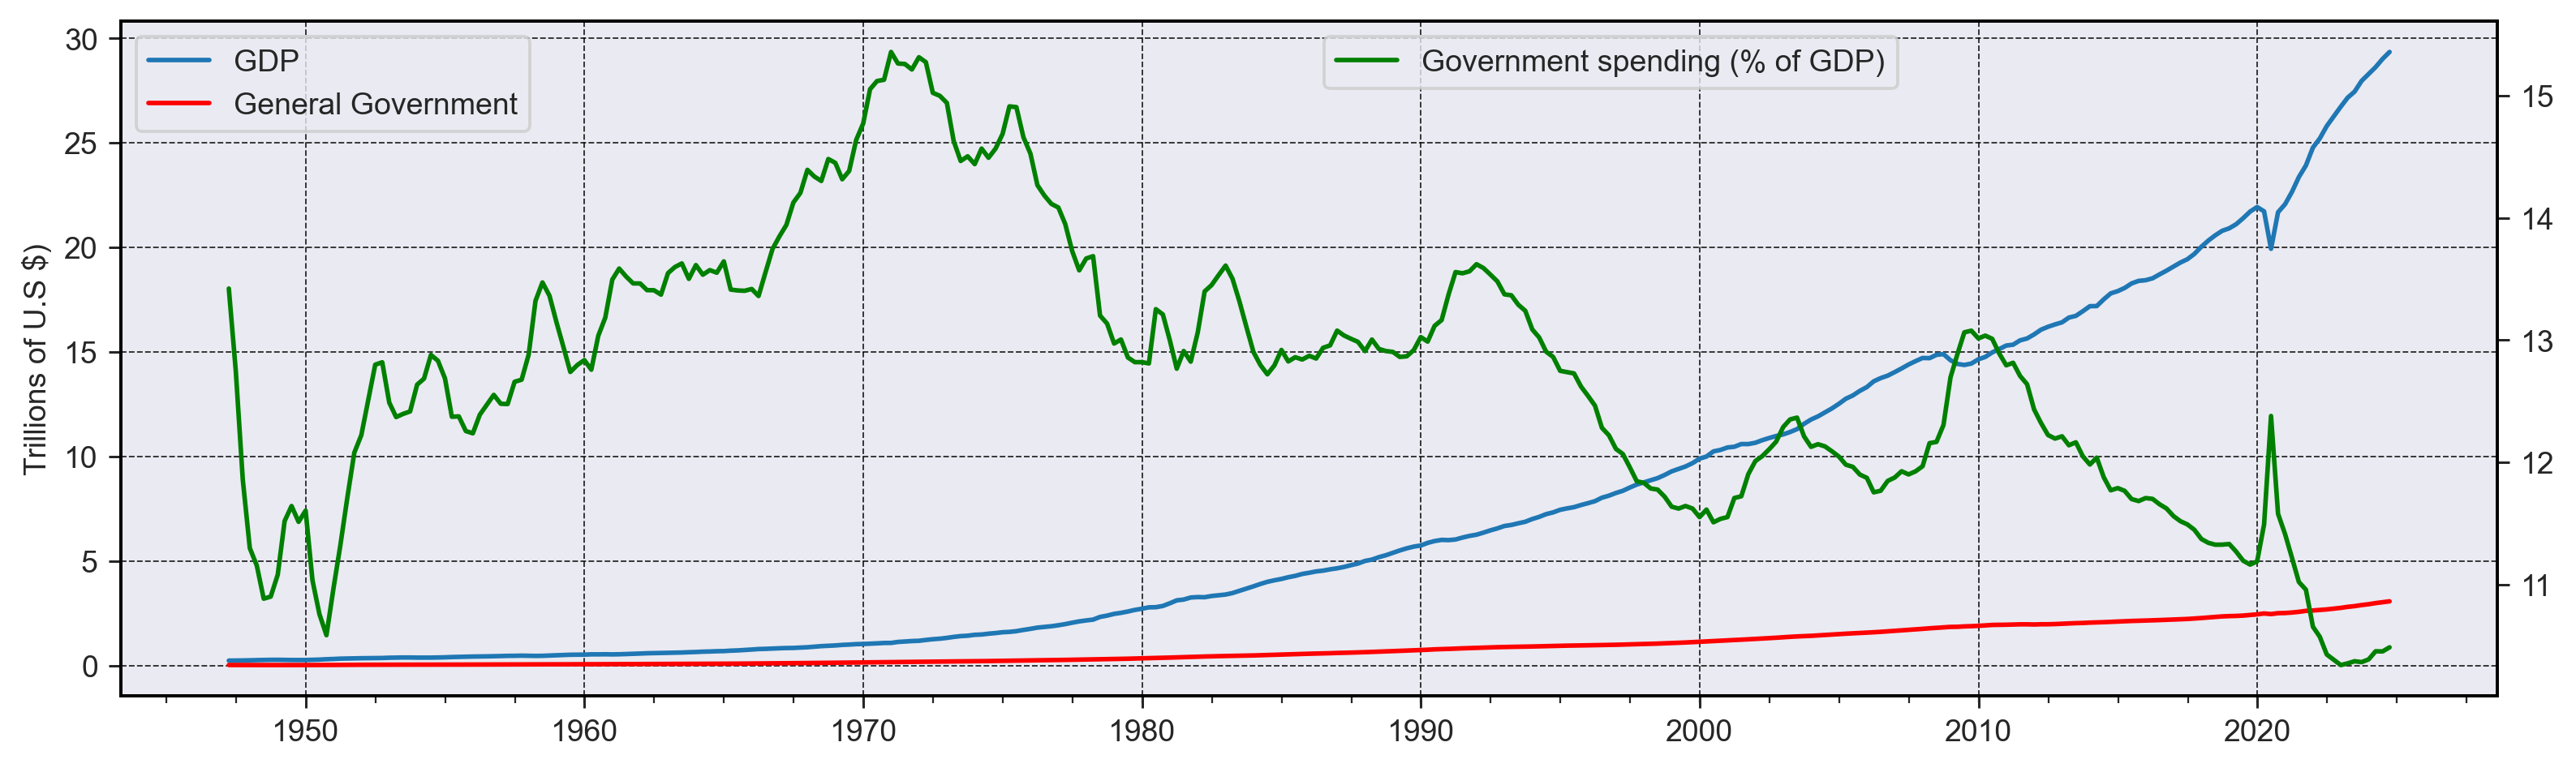

In [58]:
fig, ax = plt.subplots(figsize = (14, 4))
axb = ax.twinx(); axb.grid(False)
axb.plot(majors["gov_to_gdp"], c = 'g', label = "Government spending (% of GDP)")
ax.plot(majors["Gross domestic product"], label = "GDP")
ax.set_ylabel("Trillions of U.S $)")
ax.plot(majors["General government"], c = 'r', label = "General Government")
ax.legend(); axb.legend(loc = 'upper left', bbox_to_anchor = (0.5, 1))
plt.show()

In [59]:
left_traces = {"Gross domestic product": {"name": "GDP", "x": majors.index, "y": majors["Gross domestic product"], "line": {"color": "blue"}}, 
               "General Government": {"name": "General Government", "x": majors.index, "y": majors["General government"], "line": {"color": "red"}}}
right_traces = {"Government Spending (% of GDP)": {"name": "Government Spending (% of GDP)", "x": majors.index, "y": majors["gov_to_gdp"], "line": {"color": "green"}}}
plfig = MacroBackend.charting_plotly.dual_axis_plot(left_traces, right_traces, title = "General government expenditure from Gross Value added table",
                                                    left_yaxis_title="Trillions of U.S $", right_yaxis_title="% of GDP")
plfig.show()

In [60]:
t10105 = pd.read_excel(f"{bea_path}/T10105_Q.xlsx", sheet_name="Series_Split", index_col=0, parse_dates=True)
t10105.columns

Index(['Gross domestic product', 'Personal consumption expenditures', 'Goods',
       'Durable goods', 'Nondurable goods', 'Services',
       'Gross private domestic investment', 'Fixed investment',
       'Nonresidential', 'Structures', 'Equipment',
       'Intellectual property products', 'Residential',
       'Change in private inventories', 'Net exports of goods and services',
       'Exports', 'Imports',
       'Government consumption expenditures and gross investment', 'Federal',
       'National defense', 'Nondefense', 'State and local'],
      dtype='object')

In [61]:
gdpmajs = t10105[["Gross domestic product", "Personal consumption expenditures", "Gross private domestic investment", 
                  "Change in private inventories", "Government consumption expenditures and gross investment", "Net exports of goods and services"]]
gdpmajs["GDP_SumOfComponents"] = gdpmajs.iloc[:, 1:].sum(axis=1)
gdpmajs /= 10**6
gdpmajs["gov_to_gdp"] = (gdpmajs["Government consumption expenditures and gross investment"] / gdpmajs["Gross domestic product"]) * 100
gdpmajs


/var/folders/lj/yg38j90s0mq9l9mk98st457m0000gn/T/ipykernel_69178/1177555150.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/lj/yg38j90s0mq9l9mk98st457m0000gn/T/ipykernel_69178/1177555150.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Gross domestic product,Personal consumption expenditures,Gross private domestic investment,Change in private inventories,Government consumption expenditures and gross investment,Net exports of goods and services,GDP_SumOfComponents,gov_to_gdp
TimePeriod,,,,,,,,
1947-03-31,0.243164,0.156161,0.035854,0.000495,0.040274,0.010875,0.243659,16.562485
1947-06-30,0.245968,0.160031,0.034505,-0.001240,0.040138,0.011294,0.244728,16.318383
1947-09-30,0.249585,0.163543,0.034911,-0.002917,0.039361,0.011770,0.246668,15.770579
1947-12-31,0.259745,0.167672,0.043250,0.001456,0.039534,0.009289,0.261201,15.220312
1948-03-31,0.265742,0.170372,0.047202,0.003626,0.040875,0.007293,0.269368,15.381460
...,...,...,...,...,...,...,...,...
2023-09-30,27.967697,18.928987,5.063353,0.089189,4.756448,-0.781091,28.056886,17.006935
2023-12-31,28.296967,19.170154,5.102814,0.056688,4.815150,-0.791152,28.353654,17.016488
2024-03-31,28.624069,19.424775,5.159903,0.021404,4.880960,-0.841569,28.645473,17.051943


In [62]:
# Create color map for traces
colors = ['blue', 'red', 'green', 'purple', 'orange', 'cyan']

# Build left_traces dict comprehension with all columns
left_traces = {
    col: {
        "name": col,
        "x": gdpmajs.index,
        "y": gdpmajs[col],
        "line": {"color": colors[i % len(colors)]}
    } for i, col in enumerate(gdpmajs.columns[:-1])
}

# Create right_traces dict for the last column
right_traces = {
    "gov_to_gdp": {
        "name": "Government Spending (% of GDP, right axis)",
        "x": gdpmajs.index,
        "y": gdpmajs["gov_to_gdp"],
    }
}

# Create plot
plfig = MacroBackend.charting_plotly.dual_axis_plot(
    left_traces, 
    right_traces,
    title="Gross domestic product: Table 1.1.5, nominal USD",
    left_yaxis_title="Triillions of U.S $",
    right_yaxis_title="% of GDP"
)

# Update layout to place legend at the bottom in a multi-column format
plfig.update_layout(
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.3,
        xanchor="center",
        x=0.5,
        title_text='',
        traceorder='normal',
        font=dict(size=12),
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)',
        borderwidth=1,
        itemwidth=120,
    )
)

plfig.show()

In [63]:
yoy = majors.pct_change(4)*100

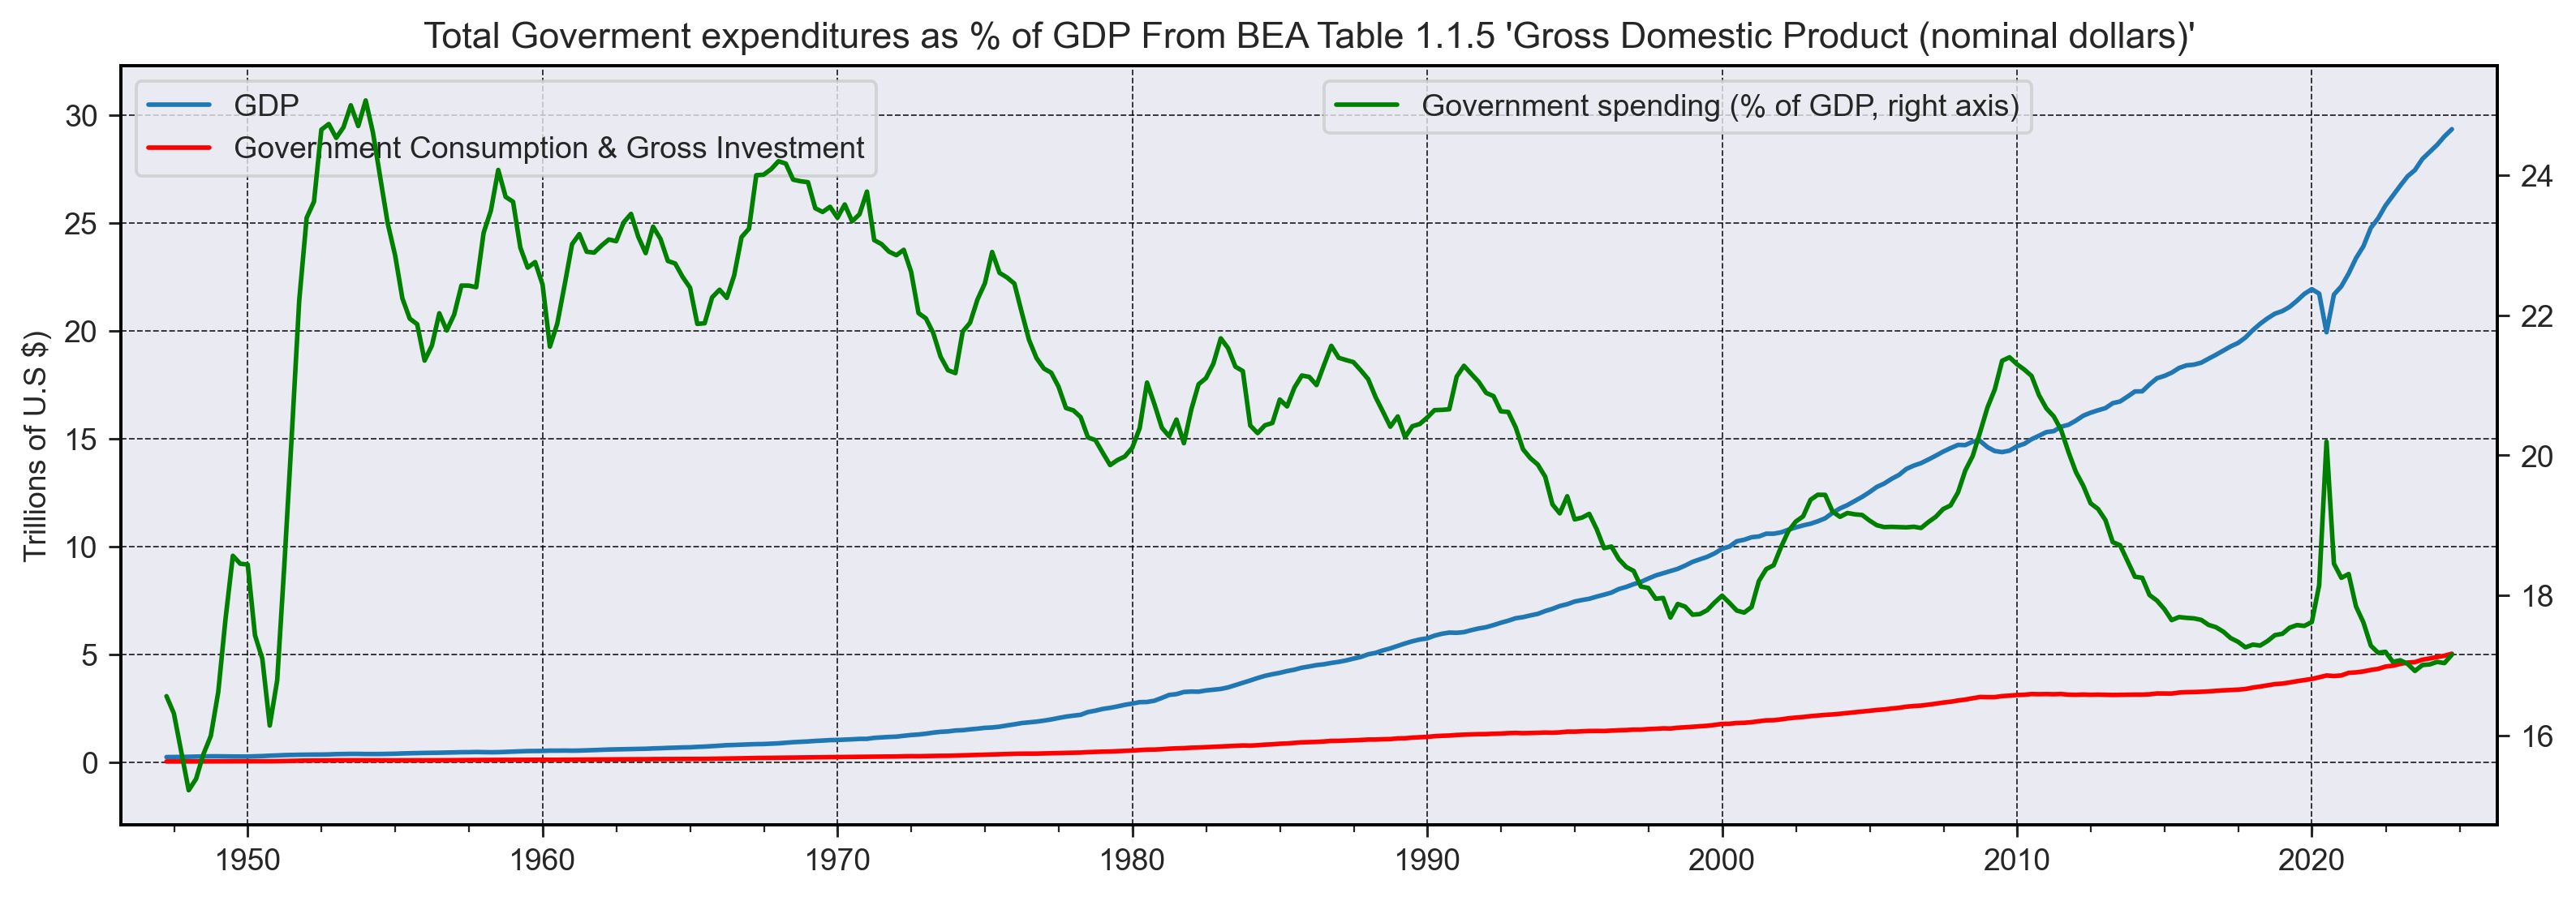

In [64]:
fig, ax = plt.subplots(figsize = (14, 4.5))
axb = ax.twinx(); axb.grid(False)
axb.plot(gdpmajs["gov_to_gdp"], c = 'g', label = "Government spending (% of GDP, right axis)")
ax.plot(gdpmajs["Gross domestic product"], label = "GDP")
ax.set_ylabel("Trillions of U.S $)")
ax.plot(gdpmajs["Government consumption expenditures and gross investment"], c = 'r', label = "Government Consumption & Gross Investment")
ax.legend(); axb.legend(loc = 'upper left', bbox_to_anchor = (0.5, 1))
ax.set_title("Total Goverment expenditures as % of GDP From BEA Table 1.1.5 'Gross Domestic Product (nominal dollars)'")
ax.margins(0.02, 0.1)
plt.show()

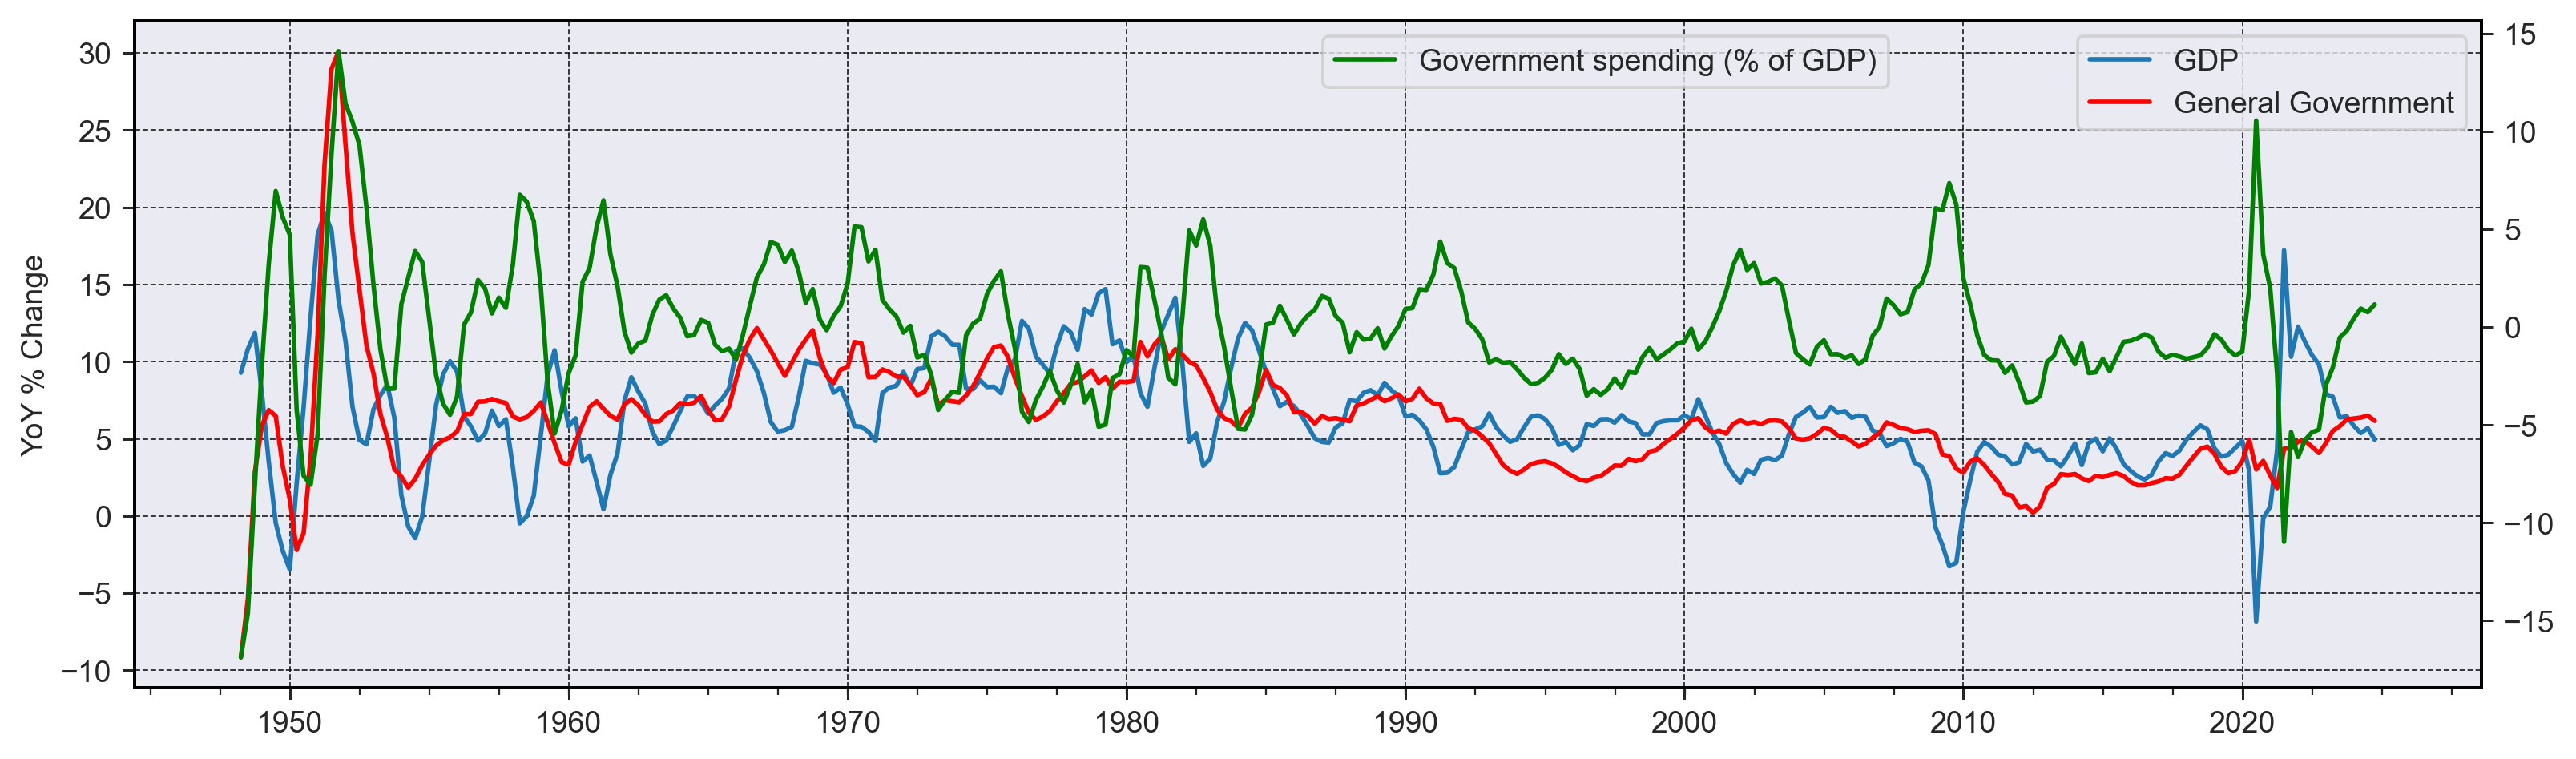

In [65]:
fig, ax = plt.subplots(figsize = (14, 4))
axb = ax.twinx(); axb.grid(False)
axb.plot(yoy["gov_to_gdp"], c = 'g', label = "Government spending (% of GDP)")
ax.plot(yoy["Gross domestic product"], label = "GDP")
ax.set_ylabel("YoY % Change")
ax.plot(yoy["General government"], c = 'r', label = "General Government")
ax.legend(); axb.legend(loc = 'upper left', bbox_to_anchor = (0.5, 1))
plt.show()

In [66]:
print(gdpmajs.columns)
nonGovComps = gdpmajs[['Personal consumption expenditures',
       'Gross private domestic investment', 'Change in private inventories',
       'Net exports of goods and services']].sum(axis = 1).rename("Non-Government GDP Components")
GovVsRest = pd.concat([gdpmajs["Gross domestic product"], gdpmajs['Government consumption expenditures and gross investment'], nonGovComps], axis = 1)
GovVsRest

Index(['Gross domestic product', 'Personal consumption expenditures',
       'Gross private domestic investment', 'Change in private inventories',
       'Government consumption expenditures and gross investment',
       'Net exports of goods and services', 'GDP_SumOfComponents',
       'gov_to_gdp'],
      dtype='object')


,Gross domestic product,Government consumption expenditures and gross investment,Non-Government GDP Components
TimePeriod,,,
1947-03-31,0.243164,0.040274,0.203385
1947-06-30,0.245968,0.040138,0.204590
1947-09-30,0.249585,0.039361,0.207307
1947-12-31,0.259745,0.039534,0.221667
1948-03-31,0.265742,0.040875,0.228493
...,...,...,...
2023-09-30,27.967697,4.756448,23.300438
2023-12-31,28.296967,4.815150,23.538504
2024-03-31,28.624069,4.880960,23.764513


In [67]:
tab15_yoy = GovVsRest.pct_change(4)*100
figle = MacroBackend.charting_plotly.px_bar(tab15_yoy, title = "GDP components YoY % change", yax_label="YoY % change in index")


Data columns:  Index(['Gross domestic product',
       'Government consumption expenditures and gross investment',
       'Non-Government GDP Components'],
      dtype='object') 
 Left axis:  ['Gross domestic product', 'Government consumption expenditures and gross investment', 'Non-Government GDP Components'] 
 Right axis:  None


In [68]:
qoq = majors.pct_change(1)*100
fig = MacroBackend.charting_plotly.px_bar(qoq, columns=["Business", "Households and institutions", "General government"],
             barmode='group', title="GDP Components - Gross value added (QoQ % Change)", yax_label="QoQ % change")

# Update layout to reduce margins and legend font size
fig.update_layout(
    margin=dict(l=20, r=20, t=40, b=20),
    legend=dict(font=dict(size=11))
)

# Add y-axis label
fig.update_yaxes(title_text="QoQ % change")

fig.show()

Data columns:  Index(['Gross domestic product', 'Business', 'Households and institutions',
       'General government', 'Gross housing value added', 'GDP_Aggregate',
       'gov_to_gdp'],
      dtype='object') 
 Left axis:  ['Business', 'Households and institutions', 'General government'] 
 Right axis:  None


In [69]:
GovVsRest_qoq = (GovVsRest.pct_change(1)*100).dropna()
# Create bar chart with properly formatted data
figur = px.bar(
    data_frame=GovVsRest_qoq,
    x=GovVsRest_qoq.index,
    y=["Gross domestic product", "Non-Government GDP Components", 
       "Government consumption expenditures and gross investment"],
    barmode='group',
    title="Total Government Expenditure vs other GDP components (QoQ % Change)"
)

# Update layout to reduce margins and legend font size
figur.update_layout(
    margin=dict(l=20, r=20, t=40, b=20),
    legend=dict(font=dict(size=11))
)

# Update layout to place legend at the bottom in a multi-column format
figur.update_layout(legend=dict(
        orientation="h", yanchor="bottom",
        y=-0.3, xanchor="center",
        x=0.5, traceorder='normal',
        font=dict(size=12), bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)', borderwidth=1, itemwidth=120,
        title_text='')
    )

# Add y-axis label and set y-axis range
figur.update_yaxes(title_text="QoQ % change", range=[-20, 25])

figur.show()

In [70]:
treas = MacroBackend.PriceImporter.tresury_api(start_date="1970-01-01")
treas

,record_date,parent_id,classification_id,classification_desc,current_month_gross_rcpt_amt,current_month_gross_outly_amt,current_month_dfct_sur_amt,table_nbr,src_line_nbr,print_order_nbr,...,data_type_cd,record_type_cd,sequence_level_nbr,sequence_number_cd,record_fiscal_year,record_fiscal_quarter,record_calendar_year,record_calendar_quarter,record_calendar_month,record_calendar_day
0,2015-03-31,null,12662418,FY 2014,null,null,null,1,1,1,...,S,SL,1,1,2015,2,2015,1,03,31
1,2015-03-31,12662418,12662420,October,198927420975.74,289511349891.27,90583928915.53,1,2,2,...,D,MTH,2,1.1,2015,2,2015,1,03,31
2,2015-03-31,12662418,12662434,September,351244071276.02,245441413562.49,-105802657713.53,1,13,13,...,D,MTH,2,1.12,2015,2,2015,1,03,31
3,2015-03-31,12662418,12662435,Year-to-Date,3020370179082.70,3503729629914.31,483359450831.61,1,14,14,...,T,SL,2,1.13,2015,2,2015,1,03,31
4,2015-03-31,12662436,12662438,October,212718687273.12,334431604362.31,121712917089.19,1,16,16,...,D,MTH,2,2.1,2015,2,2015,1,03,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2015-07-31,null,14973360,FY 2014,null,null,null,1,1,1,...,S,SL,1,1,2015,4,2015,3,07,31
96,2015-07-31,14973360,14973361,October,198927420975.74,289511349891.27,90583928915.53,1,2,2,...,D,MTH,2,1.1,2015,4,2015,3,07,31
97,2015-07-31,14973360,14973362,November,182452730681.00,317679064766.45,135226334085.45,1,3,3,...,D,MTH,2,1.2,2015,4,2015,3,07,31
98,2015-07-31,14973360,14973363,December,285041127579.40,231820736580.68,-53220390998.72,1,4,4,...,D,MTH,2,1.3,2015,4,2015,3,07,31


In [106]:
# Usage example:
data = MacroBackend.PriceImporter.treasury_api_paginated(
   endpoint='/v1/accounting/mts/mts_table_5',
   start_date='2010-01-01',
   # fields='record_date,account_type,close_today_bal',
   # filters=""#'&filter=account_type:in:Federal Reserve Account,Treasury General Account'
)
data

Debug - Final URL: https://api.fiscaldata.treasury.gov/services/api/fiscal_service/v1/accounting/mts/mts_table_5?filter=record_date:gte:2010-01-01&page[size]=1000
Total records: 93442, Pages needed: 94
Retrieved page 1/94 (1000 records)
Retrieved page 2/94 (1000 records)
Retrieved page 3/94 (1000 records)
Retrieved page 4/94 (1000 records)
Retrieved page 5/94 (1000 records)
Retrieved page 6/94 (1000 records)
Retrieved page 7/94 (1000 records)
Retrieved page 8/94 (1000 records)
Retrieved page 9/94 (1000 records)


KeyboardInterrupt: 

In [94]:
import numpy as np
print(data.columns)
data.to_excel("treasury_data.xlsx")
%pwd

Index(['record_date', 'parent_id', 'classification_id', 'classification_desc',
       'current_month_gross_rcpt_amt', 'current_month_gross_outly_amt',
       'current_month_dfct_sur_amt', 'table_nbr', 'src_line_nbr',
       'print_order_nbr', 'line_code_nbr', 'data_type_cd', 'record_type_cd',
       'sequence_level_nbr', 'sequence_number_cd', 'record_fiscal_year',
       'record_fiscal_quarter', 'record_calendar_year',
       'record_calendar_quarter', 'record_calendar_month',
       'record_calendar_day'],
      dtype='object')


'/Users/jamesbishop/Documents/Python/Bootleg_Macro/User_Data/BEA'

In [104]:
data_sel = data[['record_fiscal_year', 'record_fiscal_quarter', 'current_month_dfct_sur_amt', 'current_month_gross_rcpt_amt', 'current_month_gross_outly_amt']]
data_sel.replace("null", np.nan, inplace=True)
data_sel = data_sel.dropna()
# Set different data types for different columns
data_sel = data_sel.astype({
    'record_fiscal_year': 'int64',
    'record_fiscal_quarter': 'int64',
    'current_month_dfct_sur_amt': 'float64',
    'current_month_gross_rcpt_amt': 'float64',
    'current_month_gross_outly_amt': 'float64'
})
# Group by fiscal year and quarter, then sum the values
aggregated_data = data_sel.groupby(['record_fiscal_year', 'record_fiscal_quarter']).sum().reset_index()

# Display the aggregated DataFrame
aggregated_data.to_excel("treasury_data_aggregated.xlsx")

/var/folders/lj/yg38j90s0mq9l9mk98st457m0000gn/T/ipykernel_69178/1725983129.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#data_sel.dropna(inplace=True)
month = data_sel['classification_desc']

index = MacroBackend.PriceImporter.parse_fiscal_months(month); print(index)
data_sel = data_sel.replace("null", np.nan).dropna()
data_sel.drop(columns = ['classification_desc', 'record_date'], inplace=True)
data_sel.set_index(index, inplace=True)
data_sel = data_sel.astype(float)
data_sel.index.rename("Fiscal Month", inplace=True)
data_sel

DatetimeIndex(['2013-10-31', '2014-09-30', '2013-10-31', '2013-11-30',
               '2013-12-31', '2014-01-31', '2014-02-28', '2014-03-31',
               '2013-11-30', '2013-12-31',
               ...
               '2024-02-29', '2024-03-31', '2024-04-30', '2024-05-31',
               '2024-06-30', '2024-07-31', '2024-08-31', '2024-09-30',
               '2024-10-31', '2024-11-30'],
              dtype='datetime64[ns]', length=2172, freq=None)


,current_month_dfct_sur_amt,current_month_gross_rcpt_amt,current_month_gross_outly_amt,current_month_dfct_sur_amt
Fiscal Month,,,,
2013-10-31,9.058393e+10,1.989274e+11,2.895113e+11,9.058393e+10
2014-09-30,-1.058027e+11,3.512441e+11,2.454414e+11,-1.058027e+11
2013-10-31,1.217129e+11,2.127187e+11,3.344316e+11,1.217129e+11
2013-11-30,5.681800e+10,1.914362e+11,2.482542e+11,5.681800e+10
2013-12-31,-1.864365e+09,3.353270e+11,3.334626e+11,-1.864365e+09
...,...,...,...,...
2024-07-31,2.437411e+11,3.303774e+11,5.741185e+11,2.437411e+11
2024-08-31,3.800804e+11,3.065397e+11,6.866201e+11,3.800804e+11
2024-09-30,-6.469794e+10,5.269883e+11,4.622903e+11,-6.469794e+10


In [74]:
factor = 10**13
data_Q = (data_sel.resample('QE').sum()/factor).round(5).astype(float)
data_Q
defi = data_Q.iloc[:, 0].copy().rename("Deficit_Or_Surplus")*(-1)
data_Q.drop('current_month_dfct_sur_amt',  axis = 1, inplace=True)
data_Q = pd.concat([data_Q, defi], axis = 1)
data_Q.columns = ["Gross_Tax_Receipts", "Gross_Spend", "Deficit_Or_Surplus_amt"]
data_Q.index.rename("Quarter", inplace = True)
data_Q.tail()

,Gross_Tax_Receipts,Gross_Spend,Deficit_Or_Surplus_amt
Quarter,,,
2024-06-30,1.24475,1.49126,-0.24651
2024-09-30,0.82059,1.15572,-0.33513
2024-12-31,0.06285,0.12527,-0.06242
2025-03-31,0.00000,0.00000,-0.00000
2025-06-30,0.15661,0.17747,-0.02086


In [75]:
data_Q_2023 = data_Q.loc["2023-01-01":"2023-12-31"]
Gross_Spend = data_Q_2023["Gross_Spend"].sum()
Gross_Spend

9.14623

In [76]:
gdp = gdpmajs["Gross domestic product"]
end23 = gdp["2023-12-31"]
(Gross_Spend/end23)*100

32.32229800458826

In [77]:
testcols =['current_month_gross_outly_amt', 'current_month_dfct_sur_amt', 'current_month_gross_rcpt_amt', 'current_month_dfct_sur_amt']
trfig = MacroBackend.charting_plotly.px_bar(data_Q, title = "Treasury Spending Data: Quarterly", yax_label="Billions of USD")
trfig.show()

Data columns:  Index(['Gross_Tax_Receipts', 'Gross_Spend', 'Deficit_Or_Surplus_amt'], dtype='object') 
 Left axis:  ['Gross_Tax_Receipts', 'Gross_Spend', 'Deficit_Or_Surplus_amt'] 
 Right axis:  None


In [107]:
total_outlays = MacroBackend.Pull_Data.dataset()
total_outlays.get_data("fred", "MTSO133FMS")
print(total_outlays.data.head(), total_outlays.SeriesInfo)

Looking for api keys in SystemInfo folder... /Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend/SystemInfo/API_Keys.json
Looking for data from source:  fred data code:  MTSO133FMS
FRED API response:  200
date
1980-10-01    55843.0
1980-11-01    48083.0
1980-12-01    50869.0
1981-01-01    63339.0
1981-02-01    53749.0
Name: MTSO133FMS, dtype: float64 id                                                                  MTSO133FMS
realtime_start                                                      2024-12-23
realtime_end                                                        2024-12-23
title                                                    Total Federal Outlays
observation_start                                                   1980-10-01
observation_end                                                     2024-11-01
frequency                                                              Monthly
frequency_short                                                              M
unit

In [184]:
spend_gross = total_outlays.data.resample('QE').sum()/10**6
spend_gross.rename("Total Outlays (Gross)", inplace=True)
MacroBackend.charting_plotly.px_bar(spend_gross, title = "Total Outlays (Gross), US Government: Quarterly", yax_label="Trillions of USD").show()

Data columns:  Index(['Total Outlays (Gross)'], dtype='object') 
 Left axis:  ['Total Outlays (Gross)'] 
 Right axis:  None


In [111]:
gdpnow = MacroBackend.Pull_Data.dataset()
gdpnow.get_data("fred", "GDPNOW")
print(gdpnow.data, gdpnow.SeriesInfo)

Looking for api keys in SystemInfo folder... /Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend/SystemInfo/API_Keys.json
Looking for data from source:  fred data code:  GDPNOW
FRED API response:  200
date
2011-07-01     3.2445
2011-10-01     5.1684
2012-01-01     3.0151
2012-04-01     0.2243
2012-07-01     1.8490
2012-10-01     0.0776
2013-01-01     2.8718
2013-04-01     1.3000
2013-07-01     2.3233
2013-10-01     3.1249
2014-01-01     0.3489
2014-04-01     2.6666
2014-07-01     2.6999
2014-10-01     3.4918
2015-01-01     0.0988
2015-04-01     2.4328
2015-07-01     1.0637
2015-10-01     1.0179
2016-01-01     0.6209
2016-04-01     1.8333
2016-07-01     2.0953
2016-10-01     2.8814
2017-01-01     0.1699
2017-04-01     2.8194
2017-07-01     2.7182
2017-10-01     3.4060
2018-01-01     1.9834
2018-04-01     3.8225
2018-07-01     3.5537
2018-10-01     1.8466
2019-01-01     2.6711
2019-04-01     1.3334
2019-07-01     1.6752
2019-10-01     1.7394
2020-01-01    -0.9691
2020-04-01   

In [112]:
cpi = MacroBackend.Pull_Data.dataset()
cpi.get_data("fred", "CPIAUCSL")
print(cpi.data, cpi.SeriesInfo)

Looking for api keys in SystemInfo folder... /Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend/SystemInfo/API_Keys.json
Looking for data from source:  fred data code:  CPIAUCSL
FRED API response:  200
date
1947-01-01     21.480
1947-02-01     21.620
1947-03-01     22.000
1947-04-01     22.000
1947-05-01     21.950
               ...   
2024-07-01    313.534
2024-08-01    314.121
2024-09-01    314.686
2024-10-01    315.454
2024-11-01    316.441
Name: CPIAUCSL, Length: 935, dtype: float64 id                                                                    CPIAUCSL
realtime_start                                                      2024-12-25
realtime_end                                                        2024-12-25
title                        Consumer Price Index for All Urban Consumers: ...
observation_start                                                   1947-01-01
observation_end                                                     2024-11-01
frequency            

In [78]:
deficit = MacroBackend.Pull_Data.dataset()
deficit.get_data("fred", "MTSDS133FMS")
print(deficit.data, deficit.SeriesInfo)

Looking for api keys in SystemInfo folder... /Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend/SystemInfo/API_Keys.json
Looking for data from source:  fred data code:  MTSDS133FMS
FRED API response:  200
date
1980-10-01    -16921.000000
1980-11-01     -8907.000000
1980-12-01     -1965.000000
1981-01-01    -12192.000000
1981-02-01    -15620.000000
                  ...      
2024-07-01   -243741.087297
2024-08-01   -380080.405435
2024-09-01     64263.008868
2024-10-01   -257450.343192
2024-11-01   -366763.064368
Name: MTSDS133FMS, Length: 530, dtype: float64 id                                                                 MTSDS133FMS
realtime_start                                                      2024-12-20
realtime_end                                                        2024-12-20
title                                           Federal Surplus or Deficit [-]
observation_start                                                   1980-10-01
observation_end             

In [119]:
deflator = MacroBackend.Pull_Data.dataset()
deflator.get_data("fred", "A191RI1Q225SBEA")
print(deflator.data, deflator.SeriesInfo)

Looking for api keys in SystemInfo folder... /Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend/SystemInfo/API_Keys.json
Looking for data from source:  fred data code:  A191RI1Q225SBEA
FRED API response:  200
date
1947-04-01     5.8
1947-07-01     6.9
1947-10-01    10.2
1948-01-01     3.2
1948-04-01     3.7
              ... 
2023-07-01     3.2
2023-10-01     1.6
2024-01-01     3.0
2024-04-01     2.5
2024-07-01     1.9
Name: A191RI1Q225SBEA, Length: 310, dtype: float64 id                                                             A191RI1Q225SBEA
realtime_start                                                      2024-12-26
realtime_end                                                        2024-12-26
title                          Gross Domestic Product: Implicit Price Deflator
observation_start                                                   1947-04-01
observation_end                                                     2024-07-01
frequency                               

In [113]:
gdpf = MacroBackend.Pull_Data.dataset()
gdpf.get_data("fred", "GDP")
print(gdpf.data, gdpf.SeriesInfo)

Looking for api keys in SystemInfo folder... /Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend/SystemInfo/API_Keys.json
Looking for data from source:  fred data code:  GDP
FRED API response:  200
date
1947-01-01      243.164
1947-04-01      245.968
1947-07-01      249.585
1947-10-01      259.745
1948-01-01      265.742
                ...    
2023-07-01    27967.697
2023-10-01    28296.967
2024-01-01    28624.069
2024-04-01    29016.714
2024-07-01    29374.914
Name: GDP, Length: 311, dtype: float64 id                                                                         GDP
realtime_start                                                      2024-12-25
realtime_end                                                        2024-12-25
title                                                   Gross Domestic Product
observation_start                                                   1947-01-01
observation_end                                                     2024-07-01
frequency

In [ ]:
datas = pd.concat([gdpf.data.resample('QE').first(), gdpnow.data.resample('QE').first(), cpi.data.resample('QE').first(), deficit.data.resample('QE').first(), deflator.data.resample('QE').first()], axis = 1)
yoy = datas[["GDP", "CPIAUCSL"]].pct_change(4)*100
yoy.columns = ["GDP_YoY%", "CPI_YoY%"]
print(yoy)
datas = pd.concat([datas, yoy], axis = 1)
datas.columns
datas["dflator_cpi_diff"] = datas["CPI_YoY%"] - datas["GDP_YoY%"]
datas.columns = ["GDP", "GDPNOW", "CPI", "Gov Deficit (USD)", "GDP Deflator", "GDP_YoY%", "CPI_YoY%", "Deflator_CPI_Diff"]

In [150]:
capped = pd.Series(datas["Deflator_CPI_Diff"]['1990-01-01'::]).apply(lambda x: x if abs(x) <= 5 else np.nan)
print(capped.mean(), capped.std())
capped

-2.0418318519537073 1.7458503944913533


date
1990-03-31   -1.360344
1990-06-30   -1.481119
1990-09-30   -0.794955
1990-12-31    1.899241
1991-03-31    2.880410
                ...   
2023-12-31   -2.599480
2024-03-31   -2.267641
2024-06-30   -2.335099
2024-09-30   -2.108014
2024-12-31   -1.233083
Freq: QE-DEC, Name: Deflator_CPI_Diff, Length: 140, dtype: float64

In [185]:
datas.loc["2024-12-31", "GDP Deflator"] = round((datas.loc["2024-12-31", "CPI_YoY%"] - 1.45), 1)
datas.loc["2024-12-31", "GDP_YoY%"] = datas.loc["2024-12-31", "GDPNOW"] + datas.loc["2024-12-31", "GDP Deflator"]
datas.loc["2024-12-31", "GDP"] =  datas.loc["2023-12-31", "GDP"]*1.04191
datas

,GDP,GDPNOW,CPI,Gov Deficit (USD),GDP Deflator,GDP_YoY%,CPI_YoY%,Deflator_CPI_Diff,GDP_o
date,,,,,,,,,
1947-03-31,243.164000,NaN,21.480,NaN,NaN,NaN,NaN,NaN,243.164
1947-06-30,245.968000,NaN,22.000,NaN,5.8,NaN,NaN,NaN,245.968
1947-09-30,249.585000,NaN,22.230,NaN,6.9,NaN,NaN,NaN,249.585
1947-12-31,259.745000,NaN,22.910,NaN,10.2,NaN,NaN,NaN,259.745
1948-03-31,265.742000,NaN,23.680,NaN,3.2,9.285092,10.242086,0.956994,265.742
...,...,...,...,...,...,...,...,...,...
2023-12-31,28296.967000,2.3834,307.531,-66563.551130,1.6,5.845267,3.245787,-2.599480,28296.967
2024-03-31,28624.069000,2.7047,309.685,-21930.356331,3.0,5.373622,3.105981,-2.267641,28624.069
2024-06-30,29016.714000,2.6132,313.207,209529.306625,2.5,5.692830,3.357731,-2.335099,29016.714


In [186]:
datas["Gross_Spend_GDP"] = (spend_gross/datas["GDP"])*100
datas["Gross_Spend_GDP_np"] = (spend_gross/datas["GDP_o"])*100
datas

,GDP,GDPNOW,CPI,Gov Deficit (USD),GDP Deflator,GDP_YoY%,CPI_YoY%,Deflator_CPI_Diff,GDP_o,Gross_Spend_GDP,Gross_Spend_GDP_np
date,,,,,,,,,,,
1947-03-31,243.164000,NaN,21.480,NaN,NaN,NaN,NaN,NaN,243.164,NaN,NaN
1947-06-30,245.968000,NaN,22.000,NaN,5.8,NaN,NaN,NaN,245.968,NaN,NaN
1947-09-30,249.585000,NaN,22.230,NaN,6.9,NaN,NaN,NaN,249.585,NaN,NaN
1947-12-31,259.745000,NaN,22.910,NaN,10.2,NaN,NaN,NaN,259.745,NaN,NaN
1948-03-31,265.742000,NaN,23.680,NaN,3.2,9.285092,10.242086,0.956994,265.742,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31,28296.967000,2.3834,307.531,-66563.551130,1.6,5.845267,3.245787,-2.599480,28296.967,0.005716,0.005716
2024-03-31,28624.069000,2.7047,309.685,-21930.356331,3.0,5.373622,3.105981,-2.267641,28624.069,0.005713,0.005713
2024-06-30,29016.714000,2.6132,313.207,209529.306625,2.5,5.692830,3.357731,-2.335099,29016.714,0.006099,0.006099


In [189]:
YearSpend = spend_gross.resample('YE').sum()
GDP_year = (datas["GDP"].resample('YE').last())/1000
GDP_year_np = (datas["GDP_o"].resample('YE').last())/1000
yearly = pd.concat([YearSpend, GDP_year, GDP_year_np], axis = 1)
yearly["Gross_Spend_GDP"] = (yearly["Total Outlays (Gross)"]/yearly["GDP"])*100
yearly["Gross_Spend_GDP_np"] = (yearly["Total Outlays (Gross)"]/yearly["GDP_o"])*100
yearly

,Total Outlays (Gross),GDP,GDP_o,Gross_Spend_GDP,Gross_Spend_GDP_np
date,,,,,
1947-12-31,NaN,0.259745,0.259745,NaN,NaN
1948-12-31,NaN,0.280366,0.280366,NaN,NaN
1949-12-31,NaN,0.270627,0.270627,NaN,NaN
1950-12-31,NaN,0.319945,0.319945,NaN,NaN
1951-12-31,NaN,0.356178,0.356178,NaN,NaN
...,...,...,...,...,...
2020-12-31,6.765209,22.068767,22.068767,30.655130,30.655130
2021-12-31,6.871445,24.777038,24.777038,27.733118,27.733118
2022-12-31,6.289031,26.734277,26.734277,23.524223,23.524223


In [196]:
MacroBackend.charting_plotly.px_bar(yearly["Gross_Spend_GDP"]["1980-01-01"::], title = "Total Outlays (Gross) as % of GDP: Yearly", yax_label="% of GDP").show()  

Data columns:  Index(['Gross_Spend_GDP'], dtype='object') 
 Left axis:  ['Gross_Spend_GDP'] 
 Right axis:  None


In [158]:
dafig = MacroBackend.charting_plotly.px_bar(datas['GDP Deflator'], title = "GDP Deflator (YoY%)", yax_label="%")
dafig.show()

Data columns:  Index(['GDP Deflator'], dtype='object') 
 Left axis:  ['GDP Deflator'] 
 Right axis:  None


In [79]:
defi = deficit.data.resample('QE').sum()/ 10**3
defi.index.rename("Quarter", inplace = True)
dfig = MacroBackend.charting_plotly.px_bar(defi, title = "Federal Deficit: Quarterly", yax_label="Billions of USD")
dfig.show()

Data columns:  Index(['MTSDS133FMS'], dtype='object') 
 Left axis:  ['MTSDS133FMS'] 
 Right axis:  None


In [80]:
#defi_s = defi[data_Q.index].copy().rename("Deficit (FRED)")
#data_Q = pd.concat([data_Q, defi_s], axis = 1)
trffig = MacroBackend.charting_plotly.px_bar(data_Q, title = "Treasury Spending Data: Quarterly", yax_label="Billions of USD")
trffig.show()

Data columns:  Index(['Gross_Tax_Receipts', 'Gross_Spend', 'Deficit_Or_Surplus_amt'], dtype='object') 
 Left axis:  ['Gross_Tax_Receipts', 'Gross_Spend', 'Deficit_Or_Surplus_amt'] 
 Right axis:  None


In [81]:
select = GovVsRest.index.intersection(defi.index)
selectData = GovVsRest.loc[select].copy()
selectData = pd.concat([selectData, (selectData['Government consumption expenditures and gross investment']+(defi.loc[select]/10**3))], axis = 1)
selectData.rename(columns = {'index':'Quarter', 0: "Gov. spending - deficit"}, inplace = True)
selectData['GDP if no deficit allowed'] = selectData["Non-Government GDP Components"] + selectData["Gov. spending - deficit"]

In [82]:
triffig = MacroBackend.charting_plotly.px_bar(selectData, title = "GDP: Quarterly", yax_label="Trillions of nominal USD")
triffig.show()

Data columns:  Index(['Gross domestic product',
       'Government consumption expenditures and gross investment',
       'Non-Government GDP Components', 'Gov. spending - deficit',
       'GDP if no deficit allowed'],
      dtype='object') 
 Left axis:  ['Gross domestic product', 'Government consumption expenditures and gross investment', 'Non-Government GDP Components', 'Gov. spending - deficit', 'GDP if no deficit allowed'] 
 Right axis:  None


In [83]:
selectData_yoy = selectData.pct_change(4)*100
figgel = MacroBackend.charting_plotly.px_bar(selectData_yoy, title = "GDP components YoY % change", yax_label="YoY % change in index")
figgel.show()

Data columns:  Index(['Gross domestic product',
       'Government consumption expenditures and gross investment',
       'Non-Government GDP Components', 'Gov. spending - deficit',
       'GDP if no deficit allowed'],
      dtype='object') 
 Left axis:  ['Gross domestic product', 'Government consumption expenditures and gross investment', 'Non-Government GDP Components', 'Gov. spending - deficit', 'GDP if no deficit allowed'] 
 Right axis:  None


In [84]:
selectData_qoq = (selectData.pct_change(1)*100).dropna()
# Create bar chart with properly formatted data
figgle = MacroBackend.charting_plotly.px_bar(selectData_qoq, title="GDP components (QoQ % Change)", yax_label="QoQ % change in index")
figgle.show()

Data columns:  Index(['Gross domestic product',
       'Government consumption expenditures and gross investment',
       'Non-Government GDP Components', 'Gov. spending - deficit',
       'GDP if no deficit allowed'],
      dtype='object') 
 Left axis:  ['Gross domestic product', 'Government consumption expenditures and gross investment', 'Non-Government GDP Components', 'Gov. spending - deficit', 'GDP if no deficit allowed'] 
 Right axis:  None


In [85]:
defi

Quarter
1980-12-31    -27.793000
1981-03-31    -37.394000
1981-06-30     16.382000
1981-09-30     -9.127000
1981-12-31    -48.215000
                 ...    
2023-12-31   -509.940968
2024-03-31   -554.661828
2024-06-30   -203.566880
2024-09-30   -559.558484
2024-12-31   -624.213408
Freq: QE-DEC, Name: MTSDS133FMS, Length: 177, dtype: float64

In [86]:
pct_debt = (((defi/10**3)/selectData["Government consumption expenditures and gross investment"]).dropna() * 100).rename("% of government spending that is new debt") *-1
pct_debtGDP = (((defi/10**3)/selectData["Gross domestic product"]).dropna() * 100).rename("% of GDP from new government debt") *-1
pct_debtGDP = pd.concat([pct_debtGDP, pct_debt], axis = 1)
pct_debtGDP

,% of GDP from new government debt,% of government spending that is new debt
1980-12-31,0.930915,4.564513
1981-03-31,1.196912,5.904160
1981-06-30,-0.518003,-2.525464
1981-09-30,0.279917,1.387559
1981-12-31,1.469603,7.114222
...,...,...
2023-09-30,1.081636,6.359971
2023-12-31,1.802105,10.590344
2024-03-31,1.937746,11.363786
2024-06-30,0.701550,4.118252


In [87]:
pctfig =  MacroBackend.charting_plotly.px_bar(pct_debtGDP, title = "Government spending: budget deficit fraction", yax_label="% of total spending", columns=["% of government spending that is new debt"])
pctfig.show()

Data columns:  Index(['% of GDP from new government debt', '% of government spending that is new debt'], dtype='object') 
 Left axis:  ['% of government spending that is new debt'] 
 Right axis:  None


In [88]:
pctfig =  MacroBackend.charting_plotly.px_bar(pct_debtGDP, title = "Gross Domestic Product: new debt contribution", yax_label="% of GDP", columns=["% of GDP from new government debt"])
pctfig.update_traces(marker_color='red')
pctfig.show()

Data columns:  Index(['% of GDP from new government debt', '% of government spending that is new debt'], dtype='object') 
 Left axis:  ['% of GDP from new government debt'] 
 Right axis:  None


In [89]:
subfig = MacroBackend.charting_plotly.bar_subplots(pct_debtGDP)
subfig.show()

In [90]:
pct_debtGDP

,% of GDP from new government debt,% of government spending that is new debt
1980-12-31,0.930915,4.564513
1981-03-31,1.196912,5.904160
1981-06-30,-0.518003,-2.525464
1981-09-30,0.279917,1.387559
1981-12-31,1.469603,7.114222
...,...,...
2023-09-30,1.081636,6.359971
2023-12-31,1.802105,10.590344
2024-03-31,1.937746,11.363786
2024-06-30,0.701550,4.118252
